In [1]:
import matplotlib.pyplot as plt
from pycqed import *

Here we will demonstrate the duality between the Cooper-pair box qubit and the Quantum-Phase-Slip (QPS) qubit, as discussed [here](https://www.nature.com/articles/nphys234).

First we will look at the Cooper-pair box qubit:

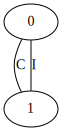

In [2]:
graph = CircuitGraph()
graph.addBranch(0, 1, "C")
graph.addBranch(0, 1, "I")
graph.addChargeBias(1, "Cg1")
graph.drawGraphViz()

In [3]:
circuit = SymbolicSystem(graph)

Optimal basis representations for the circuit coordinates:
{1: 'charge'}


In [4]:
circuit.getQuantumHamiltonian()

Matrix([[-0.5*I_{}*(D^{\dagger}_{1} + D_{1}) + 0.5*(Q_{1e} + Q_{1})**2/C_{00}]])

In [5]:
hamil = NumericalSystem(circuit)
hamil.configureOperator(1, 20, "charge")

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [6]:
# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 1.0  # uA/um^2
Aj = 0.1*0.1#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C', Ca*Aj,
    'I', Jc*Aj,
    'Cg1', 1.0,
    'Q1e', 0.5
)

In [7]:
hamil.newSweep()
hamil.addSweep('Q1e', -1.0, 1.0, 301)
sweep = hamil.paramSweep(timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.009 s
  Loop duration:	1.547 s
  Avg iteration:	0.005 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

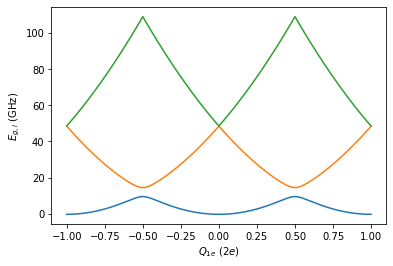

In [8]:
x, E, v = hamil.getSweep(sweep, 'Q1e', {}, evaluable='Hamiltonian')
for i in range(3):
    plt.plot(x, E[i])
plt.xlabel("$Q_{1e}$ ($2e$)")
plt.ylabel("$E_{g,i}$ (GHz)")

(-0.1, 10.1)

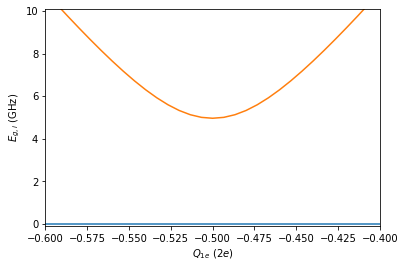

In [9]:
for i in range(3):
    plt.plot(x, E[i]-E[0])
plt.xlabel("$Q_{1e}$ ($2e$)")
plt.ylabel("$E_{g,i}$ (GHz)")
plt.xlim(-0.6, -0.4)
plt.ylim(-0.1, 10.1)

In [10]:
hamil.getJosephsonEnergies()

{(0, 1, 1): 4.966835148278948}

In [11]:
hamil.getChargingEnergies()

{1: 48.425573269268995}

As expected the minimum energy gap corresponds to the Josephson energy of the junction, and the maximum gap corresponds to the charging energy of the system.

Now we look at the QPS qubit. The flux bias term will be automatically added to the inductor.

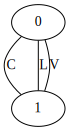

In [12]:
graph = CircuitGraph()
graph.addBranch(0, 1, "C")
graph.addBranch(0, 1, "L")
graph.addBranch(0, 1, "V")
graph.drawGraphViz()

In [13]:
circuit = SymbolicSystem(graph)

Flux bias term phi01-1e is on edge (0, 1, 1) (L).
Optimal basis representations for the circuit coordinates:
{1: 'oscillator'}


In [14]:
circuit.getQuantumHamiltonian()

Matrix([[-0.5*V_{}*(S^{\dagger}_{1} + S_{1}) + 0.5*(-1.0*\Phi_{01-1e} + \Phi_{1})**2/L_{} + 0.5*Q_{1}**2/C_{}]])

In [15]:
hamil = NumericalSystem(circuit)
hamil.configureOperator(1, 20, "flux")

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [16]:
hamil.setParameterValues(
    "V", 65.0,
    "L", 60000.0,
    "C", 100.0,
    "phi01-1e", 0.0
)

In [17]:
hamil.newSweep()
hamil.addSweep('phi01-1e', -1.0, 1.0, 301)
sweep = hamil.paramSweep(timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.037 s
  Loop duration:	1.670 s
  Avg iteration:	0.006 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

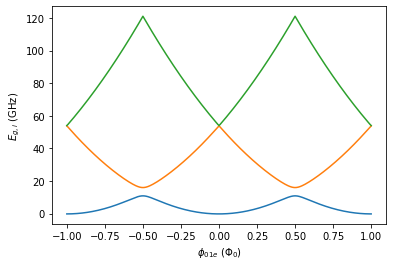

In [18]:
x, E, v = hamil.getSweep(sweep, 'phi01-1e', {})
for i in range(3):
    plt.plot(x,E[i])
plt.xlabel("$\\phi_{01e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

(-0.1, 10.1)

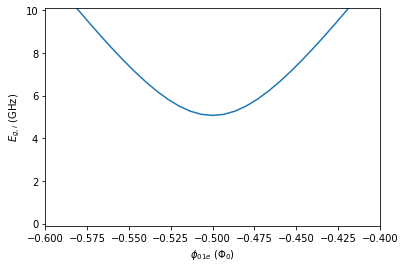

In [19]:
plt.plot(x, E[1] - E[0])
plt.xlabel("$\\phi_{01e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")
plt.xlim(-0.6, -0.4)
plt.ylim(-0.1, 10.1)

In [20]:
hamil.getPhaseSlipEnergies()

{(0, 1, 1): 0.0, (1, 0, 2): 5.002854262208263}

In [21]:
hamil.getFluxEnergies()

{1: 53.77668219139612}

Here we see the minimum gap corresponds to the Phase-Slip energy, and the maximum energy gap corresponds to the inductive energy of the system.